In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree

In [143]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id,wins,total,%
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,37,133,0.278195
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,46,121,0.380165
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,89,132,0.674242
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,70,125,0.560000
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,55,112,0.491071


In [144]:
df.drop(['Name', 'Type 2', 'Generation', 'id', 'wins', 'total'], axis=1, inplace=True)
df.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,%
0,Grass,45,49,49,65,65,45,False,0.278195
1,Grass,60,62,63,80,80,60,False,0.380165
2,Grass,80,82,83,100,100,80,False,0.674242
3,Grass,80,100,123,122,120,80,False,0.560000
4,Fire,39,52,43,60,50,65,False,0.491071


In [145]:
df = pd.get_dummies(df)
df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,%,Type 1_Bug,Type 1_Dark,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,45,49,49,65,65,45,False,0.278195,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,False,0.380165,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,False,0.674242,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,False,0.560000,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,False,0.491071,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('%', axis=1), df['%'], test_size=0.3, random_state=42)
columns = X_train.columns

In [147]:
errors = []
for i in range(1, 15):
    dt = DecisionTreeRegressor(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    y_res = dt.predict(X_test)
    errors.append(mean_squared_error(y_test, y_res))

In [148]:
errors

[0.02161722582033245,
 0.0080682559650412,
 0.005771793084553228,
 0.0047024232737563594,
 0.004074995106827739,
 0.003656926182994688,
 0.003953684490862427,
 0.0037965381933757463,
 0.004034543694181844,
 0.0047844497758134895,
 0.004905926508632866,
 0.005001939148676261,
 0.0047722323438545294,
 0.005053389658336001]

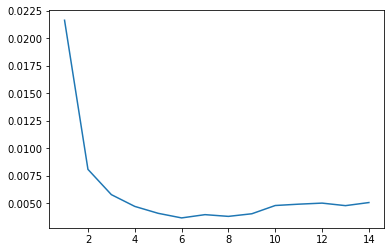

In [149]:
plt.plot(range(1, 15), errors)

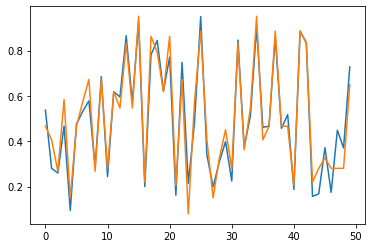

In [150]:
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_res = dt.predict(X_test)
plt.plot(range(50), y_test[:50])
plt.plot(range(50), y_res[:50])

In [151]:
dt.score(X_test, y_test)

0.9438374637053235

In [152]:
mean_squared_error(y_test, y_res)

0.003656926182994688

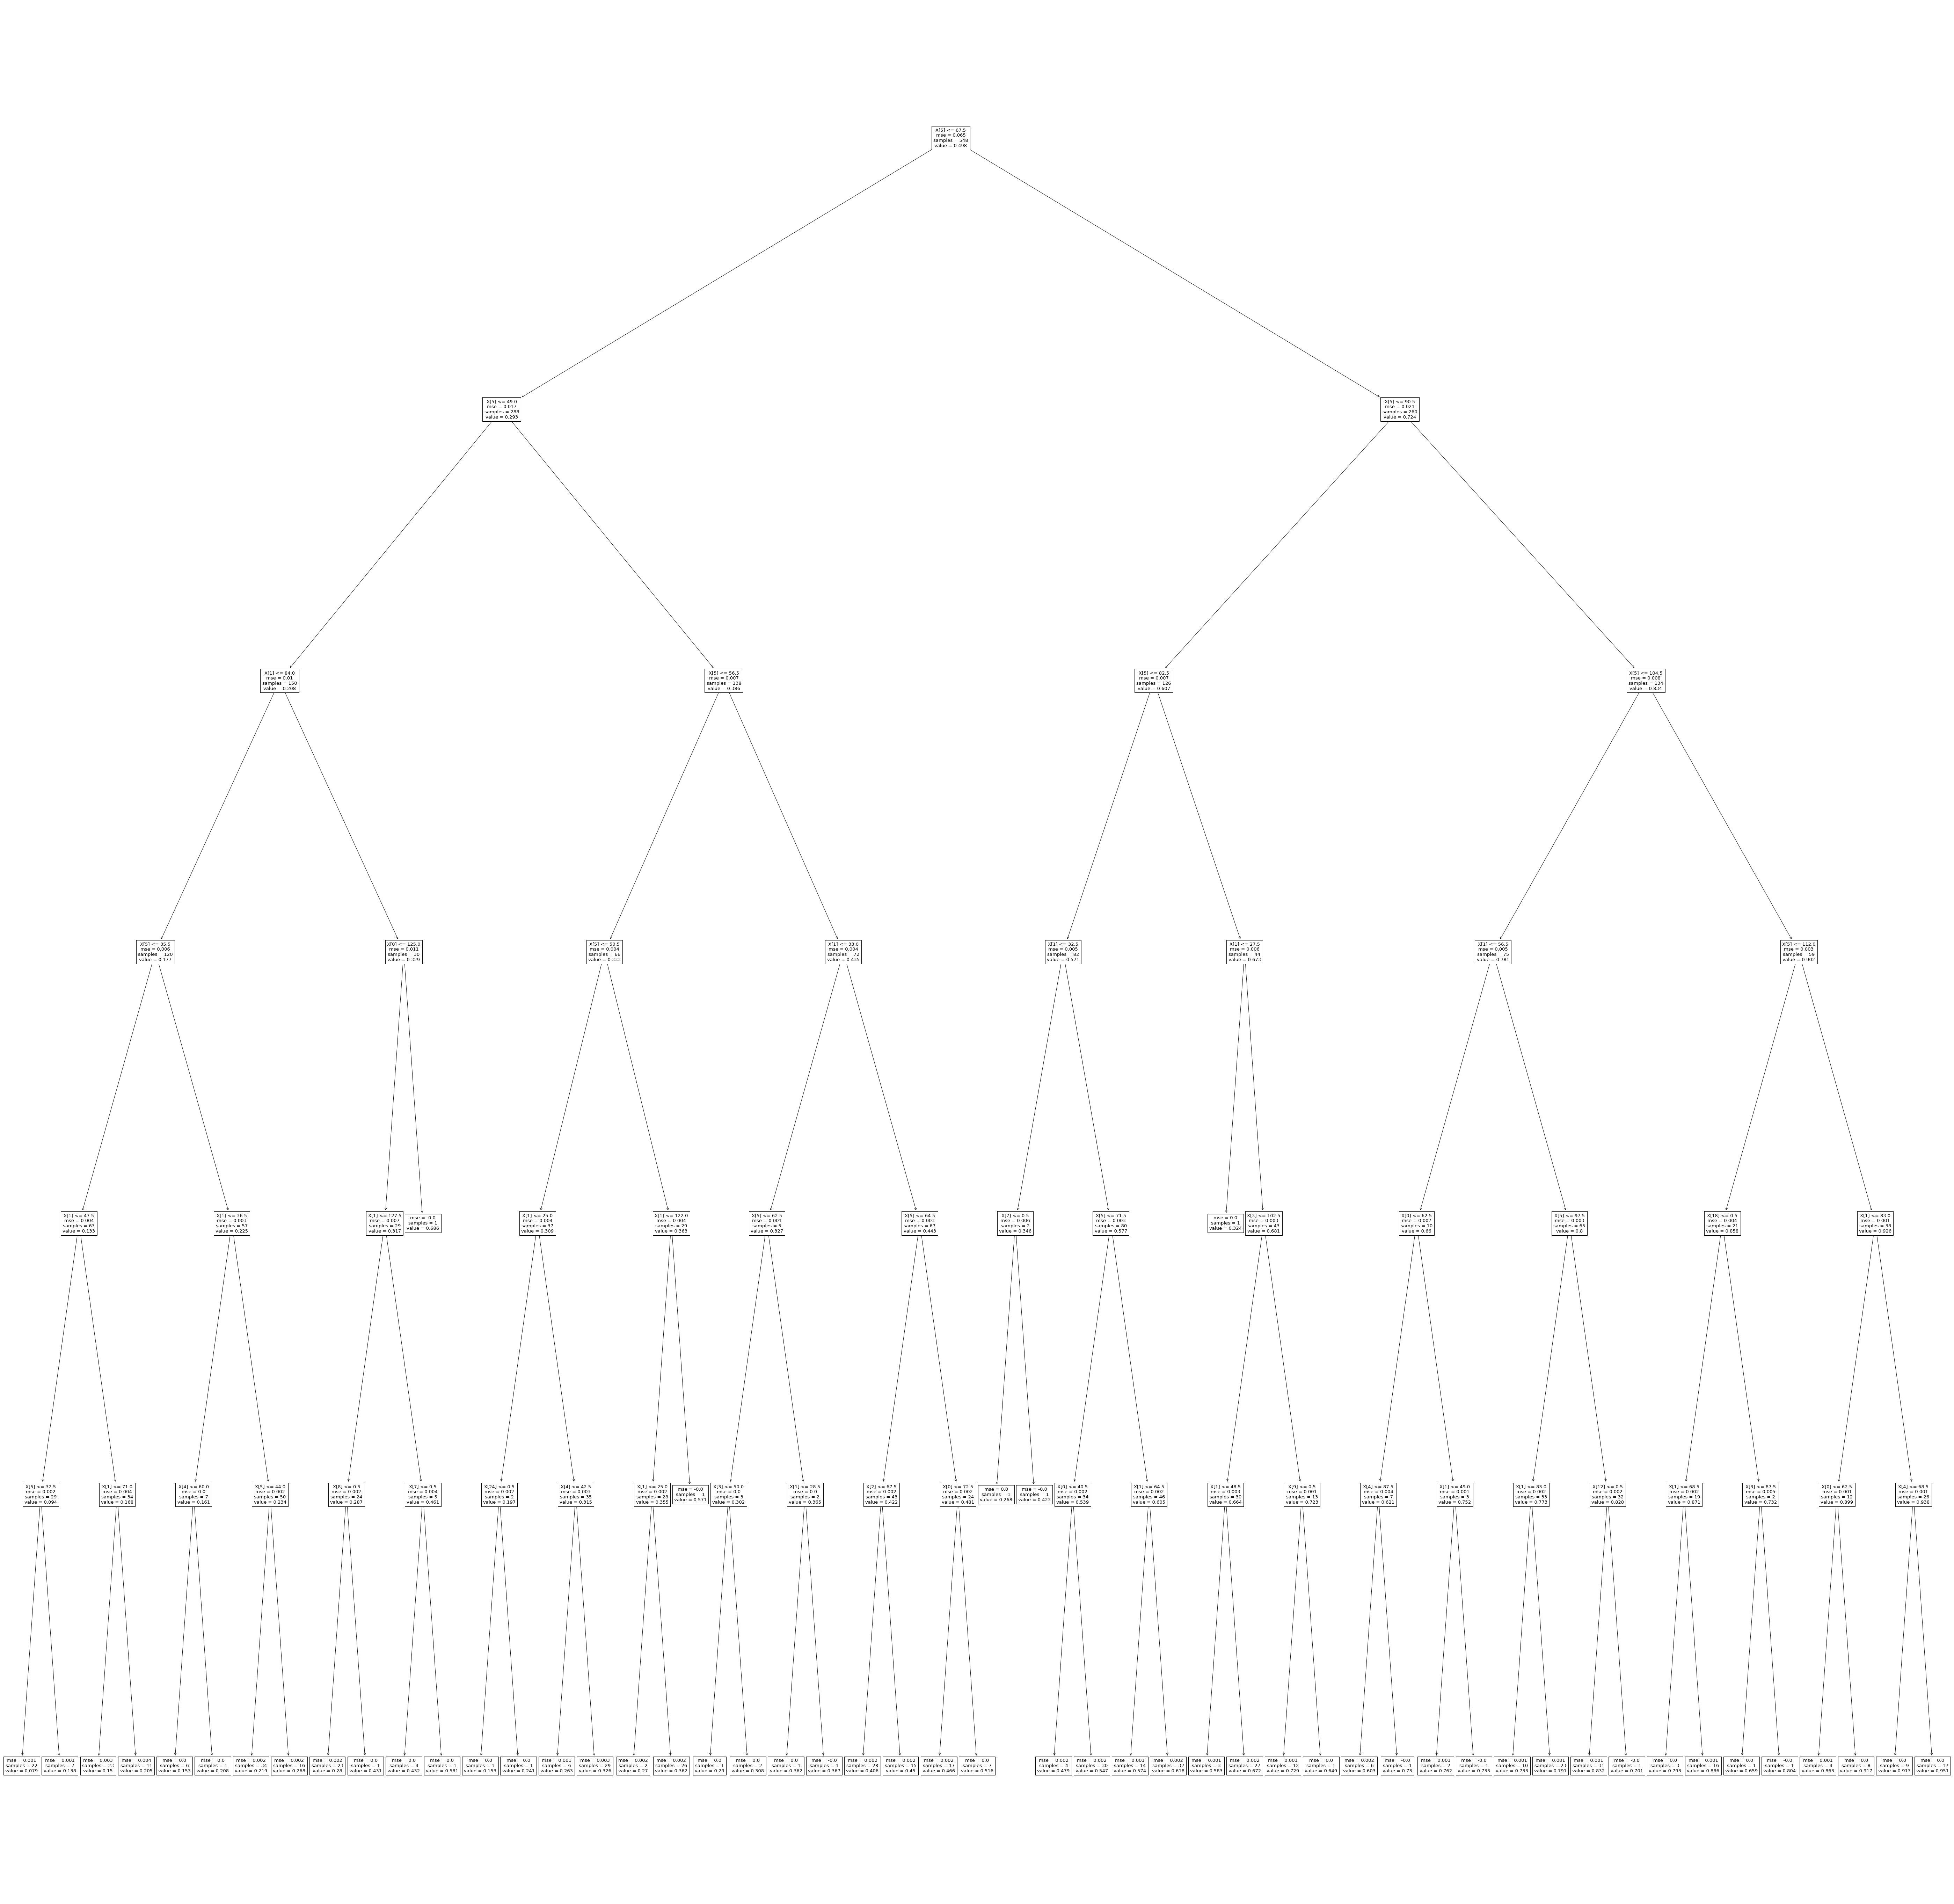

In [153]:
plt.figure(figsize=(100, 100))
tree.plot_tree(dt)
plt.show()

In [154]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

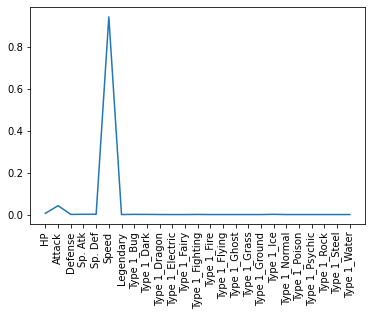

In [155]:
plt.plot(columns, dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

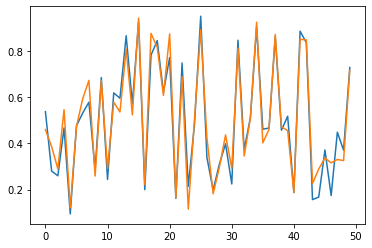

In [156]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_res = reg.predict(X_test)
plt.plot(range(50), y_test[:50])
plt.plot(range(50), y_res[:50])

In [157]:
reg.score(X_test, y_test)

0.9556560112532675

In [158]:
mean_squared_error(y_test, y_res)

0.002887381948982936

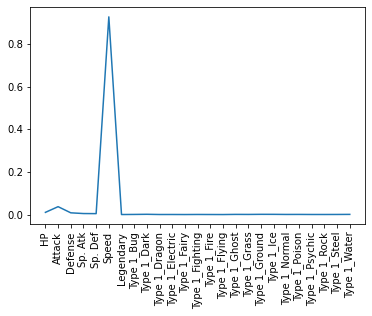

In [159]:
plt.plot(columns, reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [160]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

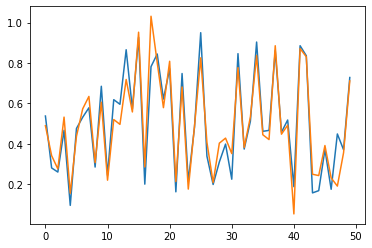

In [161]:
reg = LinearRegression().fit(X_train, y_train)
y_res = reg.predict(X_test)
plt.plot(range(50), y_test[:50])
plt.plot(range(50), y_res[:50])

In [162]:
reg.score(X_test, y_test)

0.9256817489613871

In [163]:
mean_squared_error(y_test, y_res)

0.0048391040723571544

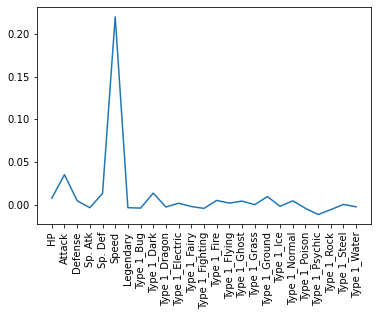

In [164]:
plt.plot(columns, reg.coef_)
plt.xticks(rotation=90)
plt.show()

In [165]:
df = df[['Speed', 'Attack', '%']]
df.head()

,Speed,Attack,%
0,45,49,0.278195
1,60,62,0.380165
2,80,82,0.674242
3,80,100,0.560000
4,65,52,0.491071


In [166]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('%', axis=1), df['%'], test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

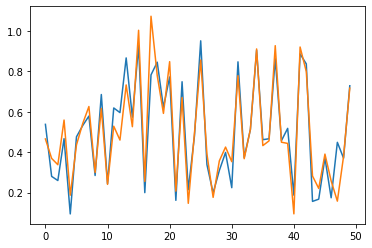

In [167]:
reg = LinearRegression().fit(X_train, y_train)
y_res = reg.predict(X_test)
plt.plot(range(50), y_test[:50])
plt.plot(range(50), y_res[:50])

In [168]:
reg.score(X_test, y_test)

0.9161242117346677

In [169]:
mean_squared_error(y_test, y_res)

0.0054614265391694184

In [170]:
reg.coef_

array([0.21997102, 0.04397656])